In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [11]:
planes = pd.read_csv("/Users/muhammadumerasif/Downloads/planes.csv")
planes.head()
#planes.info()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [23]:
def replace_time_with_decimal(time_str, hour_str, minute_str):
    
    """Converts the duration in string into a number. Takes the following arguments:
    time_str: The string to be converted
    hour_str: The string to look for the hour mark
    minute_str: The string to look for the minute mark"""
    
    parts = time_str.split(hour_str)
    hours = int(parts[0].strip())
    
    if len(parts) > 1 and minute_str in parts[1]:
        minutes = int(parts[1].replace(minute_str, '').strip())
    else:
        minutes = 0
    
    decimal_hours = hours + (minutes/60)
    return decimal_hours

In [25]:
planes = planes.dropna()
planes['Date_of_Journey'] = pd.to_datetime(planes['Date_of_Journey'], errors='coerce')
planes['Duration'] = planes['Duration'].astype(str)
planes['Duration'] = planes['Duration'].apply(replace_time_with_decimal, args = ('h', 'm'))
planes.describe()

ValueError: invalid literal for int() with base 10: '19.0'

In [27]:
def create_countplot(dataframe, column_name, x_label, y_label, title):
    """Creates a countplot. Takes the following Arguments:
        dataframe: dataframe to be used
        column_name: The column you want to apply the count function on
        x_label: label of the X-axis
        y_label: label of the Y-axis
        title: Title of the plot
    """
    
    sns.countplot(data = dataframe, x = column_name)
    plt.xlabel(x_label)
    plt.xticks(rotation = 90)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [29]:
def create_lineplot(dataframe, x_column, y_column, x_label, y_label, title, ci = None, rotation = None):
    
    """Creates a lineplot. Takes the following Arguments:
        dataframe: dataframe to be used
        x_column: The column you want on the x-axis
        y_column: The column you want on the y-axis
        x_label: label of the X-axis
        y_label: label of the Y-axis
        title: Title of the plot
        ci: If you want to see the confidence interval. Off by default.
        rotation: If you want to rotate the ticks on x-axis. Off by default
    """
    
    sns.lineplot(data = dataframe, x = x_column, y = y_column, errorbar = ci)
    plt.xlabel(x_label)
    plt.xticks(rotation = rotation)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [31]:
def create_violinplot(dataframe, x_column, y_column, x_label, y_label, title, rotation = None):
    
    """Creates a violinplot. Takes the following Arguments:
        dataframe: dataframe to be used
        x_column: The column you want on the x-axis
        y_column: The column you want on the y-axis
        x_label: label of the X-axis
        y_label: label of the Y-axis
        title: Title of the plot
        rotation: If you want to rotate the ticks on x-axis. Off by default
    """
    
    sns.violinplot(data = dataframe, x = x_column, y = y_column)
    plt.xlabel(x_label)
    plt.xticks(rotation = rotation)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [38]:
planes.groupby('Airline')['Price'].agg(
    Mean ='mean', 
    Median ='median',
    Standard_Deviation ='std',
    Kurtosis = lambda x: kurtosis(x, fisher=False),
    Skewness = 'skew'
)

,Mean,Median,Standard_Deviation,Kurtosis,Skewness
Airline,,,,,
Air Asia,5600.355372,5177.0,2024.497447,4.924416,1.470365
Air India,9541.989922,9443.0,3770.299935,5.313083,0.740592
GoAir,5461.051095,4959.0,2110.051990,13.165317,2.427418
IndiGo,5708.769741,5054.0,2270.689845,8.825292,2.027313
Jet Airways,11644.165134,11507.0,4288.553445,12.350924,1.391950
Multiple carriers,10823.664399,10010.0,3608.194780,7.001873,1.234024
SpiceJet,4300.184943,3873.0,1828.419481,24.590551,3.167378
Vistara,7950.452991,8085.0,2930.668131,4.951333,0.988751


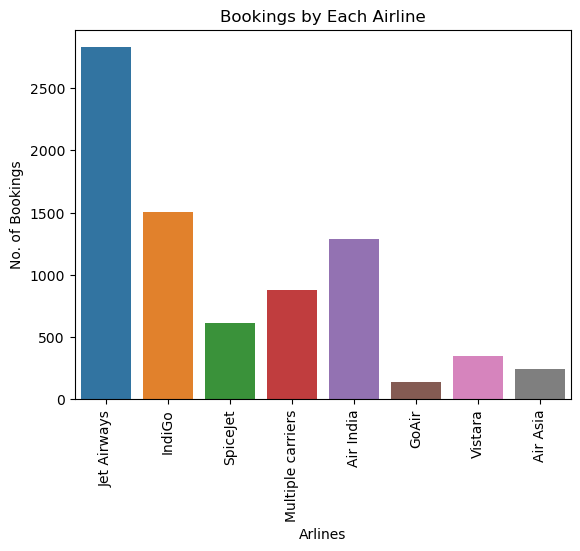

In [40]:
create_countplot(planes, 'Airline', 'Arlines', 'No. of Bookings', 'Bookings by Each Airline')

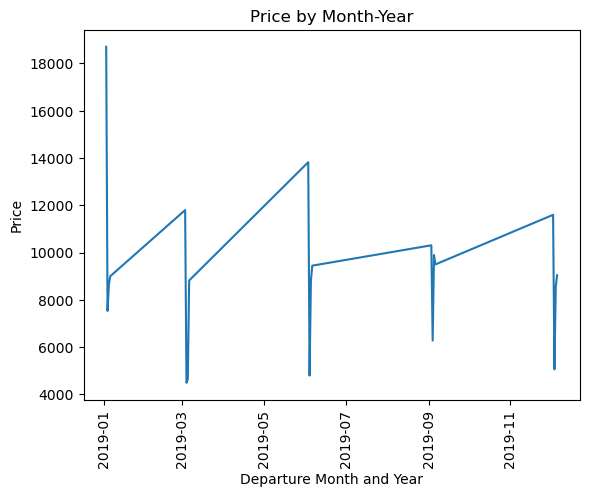

In [33]:
create_lineplot(planes, 'Date_of_Journey', 'Price', 'Departure Month and Year', 'Price', 'Price by Month-Year', rotation = 90)

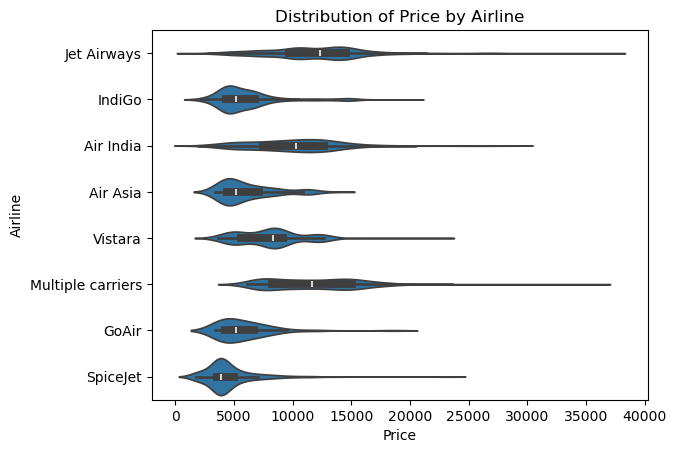

In [35]:
create_violinplot(planes, 'Price', 'Airline', 'Price', 'Airline', 'Distribution of Price by Airline')